# **ПЕРВАЯ ЧАСТЬ**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls

dz	     test_additional_data.csv  train_additional_data.csv
sample_data  test_main_data.csv        train_main_data.csv


In [ ]:
train_main_df = pd.read_csv('train_main_data.csv')
train_additional_df = pd.read_csv('train_additional_data.csv')

In [ ]:
test_main_df = pd.read_csv('test_main_data.csv')
test_additional_df = pd.read_csv('test_additional_data.csv')

In [ ]:
train_main_df.shape

(29000, 13)

In [ ]:
train_main_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,81237,2014-09-23,50,28.0,11.0,12.0,1.0,1984.0,2.0,8.0,NaN,77,8.908240e+06
1,96765,2014-07-31,42,28.0,1.0,5.0,2.0,1961.0,2.0,6.0,2.0,15,4.616088e+06
2,64804,2015-06-11,62,NaN,9.0,17.0,1.0,NaN,2.0,0.0,NaN,103,5.826177e+06
3,27439,2013-11-17,45,45.0,9.0,25.0,1.0,1.0,3.0,1.0,1.0,102,4.053249e+06
4,17258,2014-02-10,57,38.0,2.0,9.0,1.0,1968.0,3.0,6.0,3.0,15,2.024600e+06


In [ ]:
train_additional_df.head()

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,81237,78616,0.093443,6,8,3300.0,2,1,11,1,0,4,5,16.06,2.68,2,0,1,0
1,96765,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,3.24,0.00,2,0,0,0
2,64804,4001,0.007122,0,0,NaN,0,0,0,0,0,1,0,3.33,3.70,2,0,0,0
3,27439,9553,0.072158,0,0,NaN,0,0,1,0,0,0,1,0.00,14.00,0,1,0,0
4,17258,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,6.64,0.00,1,0,0,0


In [ ]:
train_additional_df.shape

(29000, 19)

# EDA

In [ ]:
train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22924 non-null  float64
 4   floor                28839 non-null  float64
 5   max_floor            19881 non-null  float64
 6   material             19881 non-null  float64
 7   build_year           16051 non-null  float64
 8   num_room             19881 non-null  float64
 9   kitch_sq             19881 non-null  float64
 10  apartment condition  16096 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


In [ ]:
train_main_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
count,29000.000000,29000.000000,22924.000000,28839.000000,19881.000000,19881.000000,1.605100e+04,19881.000000,19881.000000,16096.000000,29000.000000,2.900000e+04
mean,55032.038069,54.228000,34.418644,7.674954,12.536744,1.825210,3.127933e+03,1.910920,6.415070,2.106921,76.503172,5.772016e+06
std,25909.100401,38.553717,53.387672,5.319167,6.767270,1.478001,1.582588e+05,0.853365,28.953382,0.882152,39.199563,3.867065e+06
min,10017.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,8.098400e+04
25%,32786.750000,38.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,45.000000,3.838643e+06
50%,55005.000000,49.000000,30.000000,7.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,77.000000,5.088820e+06
75%,77421.250000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,6.721672e+06
max,99993.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,8.998222e+07


In [ ]:
train_main_df['timestamp'] = pd.to_datetime(train_main_df['timestamp'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

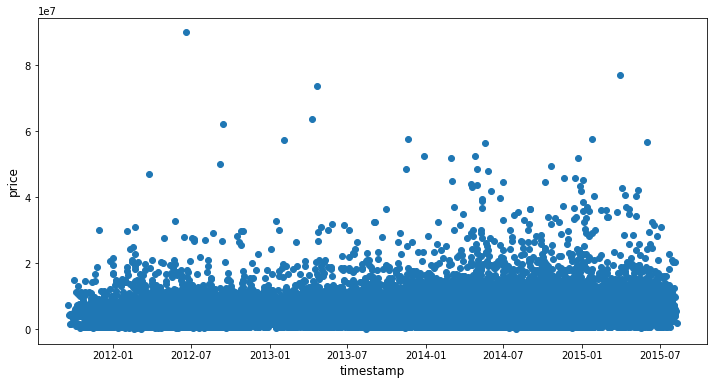

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(train_main_df.timestamp, train_main_df.price)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


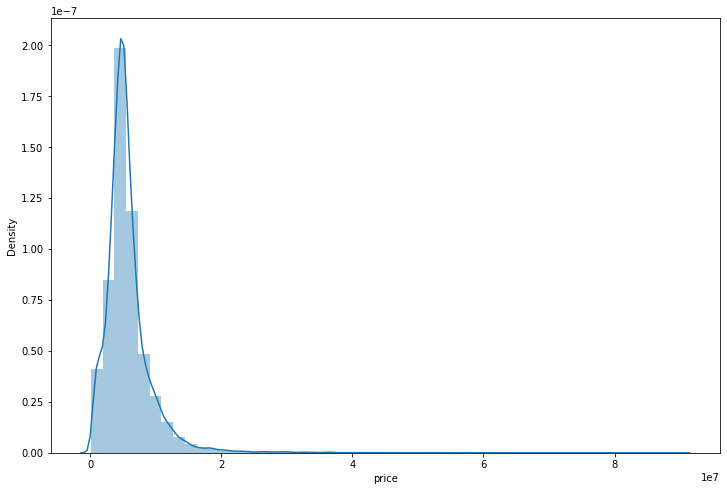

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(train_main_df.price.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

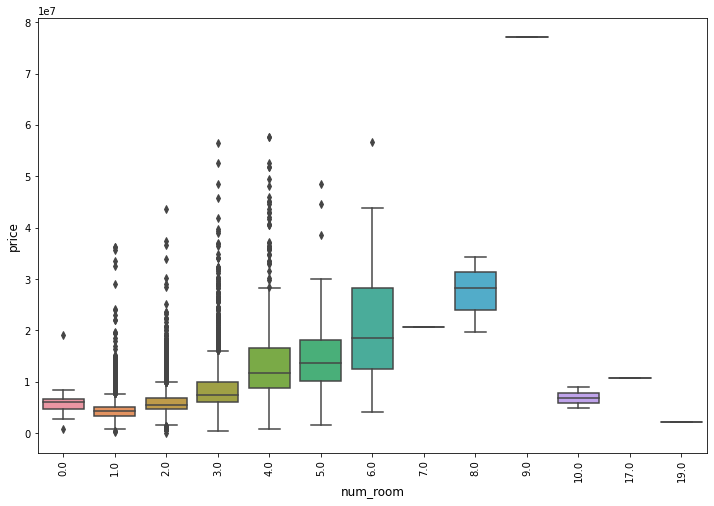

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='num_room', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('num_room', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

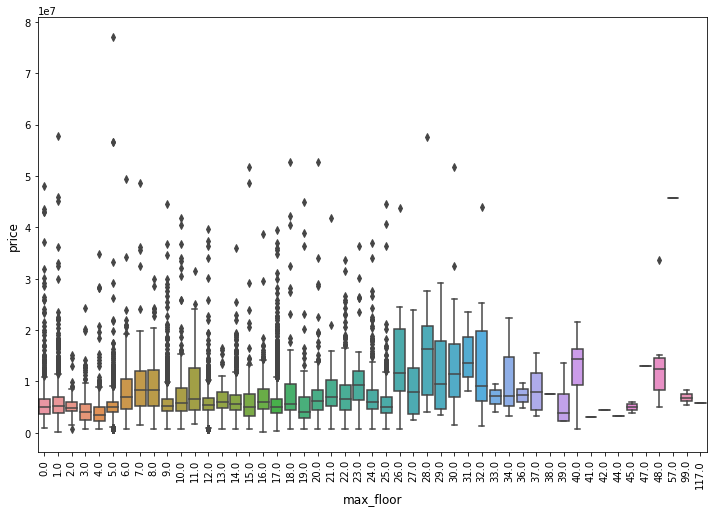

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='max_floor', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('max_floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

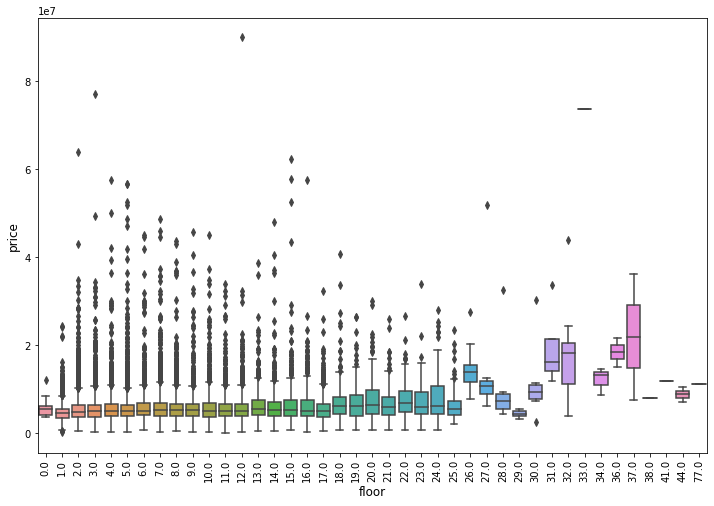

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='floor', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

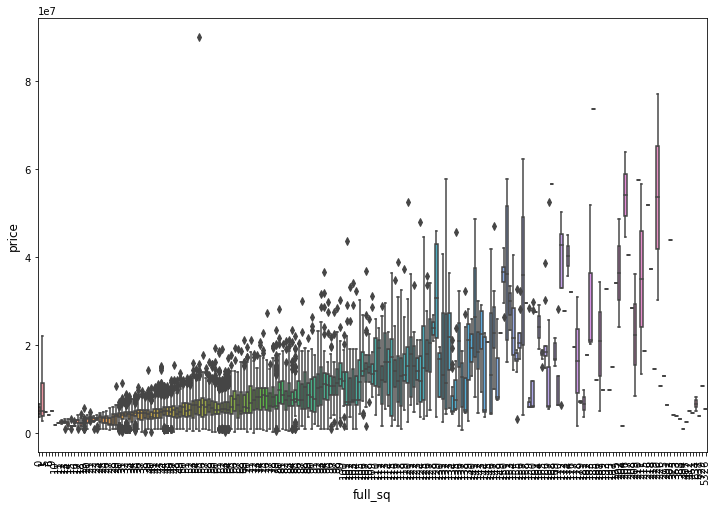

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='full_sq', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

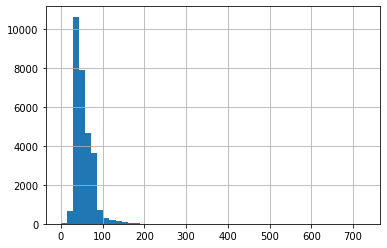

In [ ]:
train_main_df[train_main_df.full_sq < 1000].full_sq.hist(bins=50)

In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
train_main_df['full_sq_bins'] = np.searchsorted(bins, train_main_df.full_sq.values)

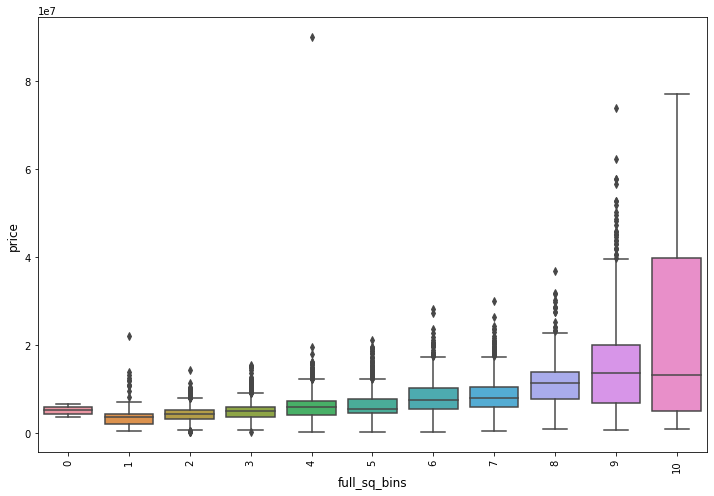

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='full_sq_bins', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq_bins', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
whole_train_df = train_main_df.merge(train_additional_df, how='left', on='id')

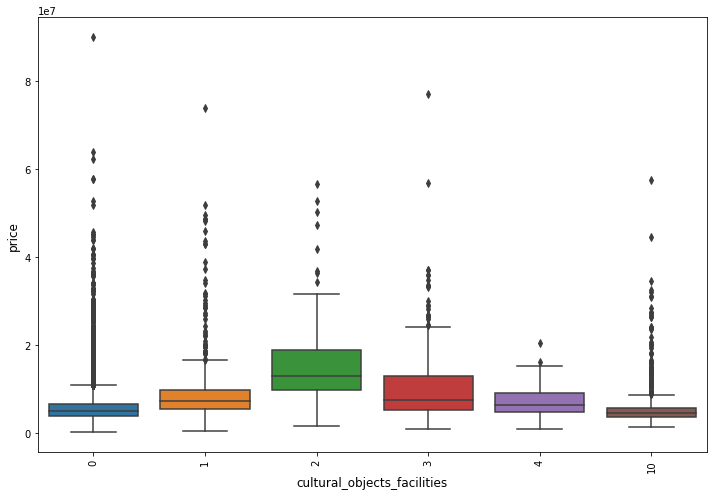

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='culture_objects_facilities', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('cultural_objects_facilities', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

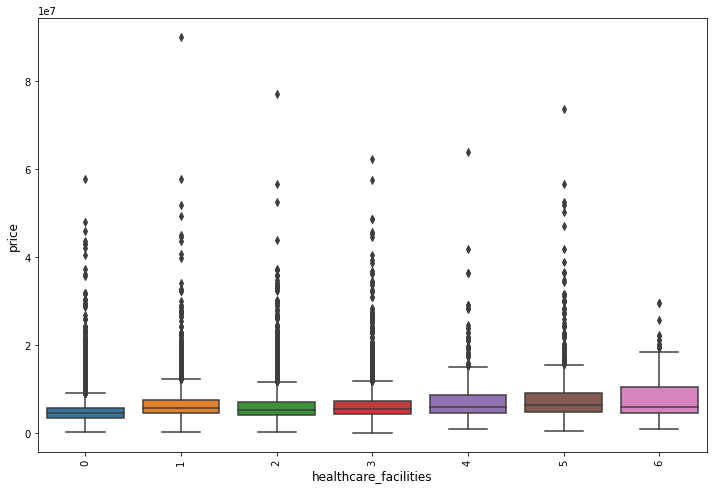

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='healthcare_facilities', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('healthcare_facilities', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

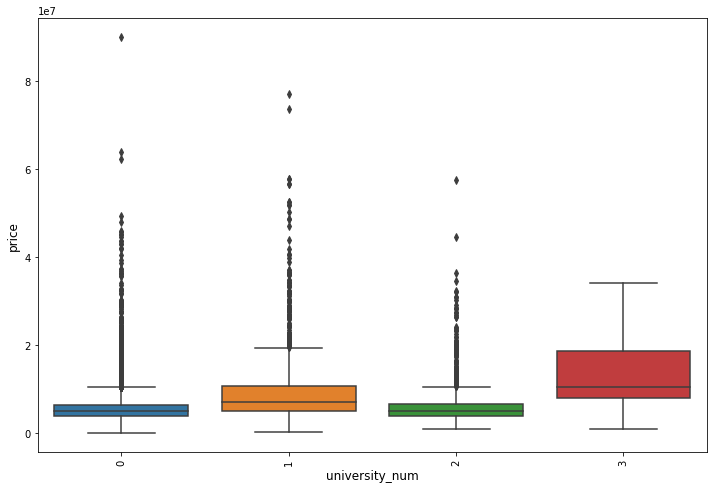

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='university_num', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('university_num', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

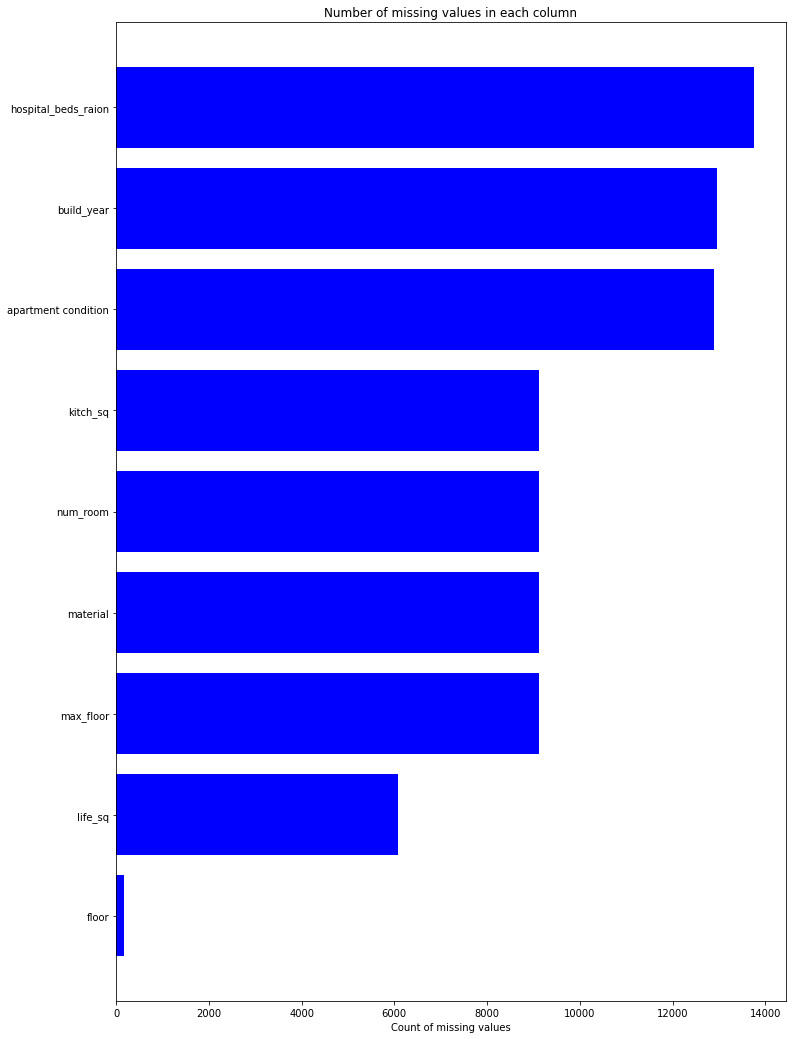

In [ ]:
missing_df = whole_train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] > 0), :]
missing_df = missing_df.sort_values(by='missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df['missing_count'], color="blue")
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

# Data preparation

In [ ]:
train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   29000 non-null  int64         
 1   timestamp            29000 non-null  datetime64[ns]
 2   full_sq              29000 non-null  int64         
 3   life_sq              22924 non-null  float64       
 4   floor                28839 non-null  float64       
 5   max_floor            19881 non-null  float64       
 6   material             19881 non-null  float64       
 7   build_year           16051 non-null  float64       
 8   num_room             19881 non-null  float64       
 9   kitch_sq             19881 non-null  float64       
 10  apartment condition  16096 non-null  float64       
 11  sub_area             29000 non-null  int64         
 12  price                29000 non-null  float64       
 13  full_sq_bins         29000 non-

In [ ]:
whole_train_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,81237,2014-09-23,50,28.0,11.0,12.0,1.0,1984.0,2.0,8.0,...,1,0,4,5,16.06,2.68,2,0,1,0
1,96765,2014-07-31,42,28.0,1.0,5.0,2.0,1961.0,2.0,6.0,...,4,0,2,0,3.24,0.00,2,0,0,0
2,64804,2015-06-11,62,NaN,9.0,17.0,1.0,NaN,2.0,0.0,...,0,0,1,0,3.33,3.70,2,0,0,0
3,27439,2013-11-17,45,45.0,9.0,25.0,1.0,1.0,3.0,1.0,...,0,0,0,1,0.00,14.00,0,1,0,0
4,17258,2014-02-10,57,38.0,2.0,9.0,1.0,1968.0,3.0,6.0,...,4,0,2,0,6.64,0.00,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,96637,2014-09-13,65,64.0,6.0,18.0,2.0,2017.0,3.0,1.0,...,0,0,0,0,16.86,2.72,0,0,0,0
28996,91710,2014-04-11,42,26.0,4.0,5.0,1.0,1963.0,2.0,5.0,...,0,0,0,1,0.00,18.07,0,0,0,0
28997,71492,2014-02-13,44,27.0,7.0,9.0,1.0,1968.0,2.0,5.0,...,3,0,10,11,1.11,3.82,2,0,0,0
28998,41071,2014-02-13,50,29.0,4.0,5.0,2.0,1956.0,2.0,7.0,...,1,0,4,3,2.18,0.00,0,0,0,0


In [ ]:
whole_train_df['year'] = whole_train_df.timestamp.dt.year
whole_train_df['month'] = whole_train_df.timestamp.dt.month
whole_train_df['week_of_year'] = whole_train_df.timestamp.dt.weekofyear
whole_train_df['day_of_week'] = whole_train_df.timestamp.dt.weekday
whole_train_df['timestamp_int'] = whole_train_df.timestamp.astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  from ipykernel import kernelapp as app


In [ ]:
whole_train_df['year_month'] = whole_train_df['year'].astype(str) + '_' + whole_train_df['month'].astype(str)

In [ ]:
whole_train_df.fillna(-99, inplace=True)

In [ ]:
whole_train_df["ratio_life_dash_full_sq"] = whole_train_df["life_sq"] / whole_train_df["full_sq"]
whole_train_df["ration_kitchen_dash_full_sq"] = whole_train_df["kitch_sq"] / whole_train_df["full_sq"]
whole_train_df['age'] = whole_train_df["build_year"] - whole_train_df['year']
whole_train_df['some_extra_sqr'] = whole_train_df["full_sq"] - whole_train_df["life_sq"]


In [ ]:
whole_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               29000 non-null  int64         
 1   timestamp                        29000 non-null  datetime64[ns]
 2   full_sq                          29000 non-null  int64         
 3   life_sq                          29000 non-null  float64       
 4   floor                            29000 non-null  float64       
 5   max_floor                        29000 non-null  float64       
 6   material                         29000 non-null  float64       
 7   build_year                       29000 non-null  float64       
 8   num_room                         29000 non-null  float64       
 9   kitch_sq                         29000 non-null  float64       
 10  apartment condition              29000 non-null  float64  

In [ ]:
test_main_df.timestamp = pd.to_datetime(test_main_df.timestamp)

In [ ]:
test_main_df.timestamp.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1000
unique                    682
top       2014-12-26 00:00:00
freq                        5
first     2011-11-01 00:00:00
last      2015-07-21 00:00:00
Name: timestamp, dtype: object

In [ ]:
whole_train_df.timestamp.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   29000
unique                   1416
top       2014-12-19 00:00:00
freq                       68
first     2011-09-18 00:00:00
last      2015-08-10 00:00:00
Name: timestamp, dtype: object

# Modeling

In [ ]:
import xgboost as xgb

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [ ]:

train_X = whole_train_df[whole_train_df.timestamp < pd.to_datetime('2015-05-01')]
train_y = whole_train_df[whole_train_df.timestamp < pd.to_datetime('2015-05-01')].price
val_X = whole_train_df.drop(['price','timestamp'], axis=1)[whole_train_df.timestamp >= pd.to_datetime('2015-05-01')]
val_y = whole_train_df[whole_train_df.timestamp >= pd.to_datetime('2015-05-01')].price

In [ ]:
col_list = ['full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'full_sq_bins', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
       'year', 'month', 'week_of_year', 'day_of_week', 'timestamp_int',
       'ratio_life_dash_full_sq', 'ration_kitchen_dash_full_sq',
       'age', 'some_extra_sqr']

In [ ]:
xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list)
xgb_test = xgb.DMatrix(val_X[col_list], val_y, feature_names = col_list)

In [ ]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [ ]:
model = xgb.train(params = xgb_params,
                  dtrain = xgb_train, 
                  num_boost_round = 300, 
                  evals = evallist, 
                  early_stopping_rounds = 10, 
                  verbose_eval = 10)

[0]	eval-rmse:7.47463e+06	train-rmse:6.61173e+06
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[10]	eval-rmse:5.1801e+06	train-rmse:4.47068e+06
[20]	eval-rmse:3.93103e+06	train-rmse:3.3339e+06
[30]	eval-rmse:3.23954e+06	train-rmse:2.75798e+06
[40]	eval-rmse:2.88754e+06	train-rmse:2.48702e+06
[50]	eval-rmse:2.66792e+06	train-rmse:2.34191e+06
[60]	eval-rmse:2.53096e+06	train-rmse:2.25807e+06
[70]	eval-rmse:2.44949e+06	train-rmse:2.20202e+06
[80]	eval-rmse:2.39544e+06	train-rmse:2.1613e+06
[90]	eval-rmse:2.36172e+06	train-rmse:2.13207e+06
[100]	eval-rmse:2.33272e+06	train-rmse:2.10799e+06
[110]	eval-rmse:2.3007e+06	train-rmse:2.08656e+06
[120]	eval-rmse:2.27533e+06	train-rmse:2.06767e+06
[130]	eval-rmse:2.26486e+06	train-rmse:2.05143e+06
[140]	eval-rmse:2.24913e+06	train-rmse:2.03691e+06
[150]	eval-rmse:2.23387e+06	train-rmse:2.02064e+06
[160]	eval-rmse:2.21971e+06	train-rmse:2.00753e+06
[17

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    whole_train_df[col_list],
    whole_train_df.price, test_size=1425, random_state=42)

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [ ]:
xgb_train = xgb.DMatrix(X_train, y_train, feature_names = col_list)
xgb_test = xgb.DMatrix(X_test, y_test, feature_names = col_list)

In [ ]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [ ]:
model_2 = xgb.train(params = xgb_params, 
                    dtrain = xgb_train, 
                    num_boost_round = 300, 
                    evals = evallist, 
                    early_stopping_rounds = 10, 
                    verbose_eval = 10)

[0]	eval-mae:5.64121e+06	train-mae:5.47647e+06
Multiple eval metrics have been passed: 'train-mae' will be used for early stopping.

Will train until train-mae hasn't improved in 10 rounds.
[10]	eval-mae:3.62406e+06	train-mae:3.46952e+06
[20]	eval-mae:2.58909e+06	train-mae:2.43214e+06
[30]	eval-mae:2.04327e+06	train-mae:1.88092e+06
[40]	eval-mae:1.75265e+06	train-mae:1.59303e+06
[50]	eval-mae:1.60348e+06	train-mae:1.44664e+06
[60]	eval-mae:1.5173e+06	train-mae:1.36798e+06
[70]	eval-mae:1.46714e+06	train-mae:1.31862e+06
[80]	eval-mae:1.43303e+06	train-mae:1.28786e+06
[90]	eval-mae:1.41094e+06	train-mae:1.26777e+06
[100]	eval-mae:1.39003e+06	train-mae:1.24878e+06
[110]	eval-mae:1.37204e+06	train-mae:1.23086e+06
[120]	eval-mae:1.36225e+06	train-mae:1.21915e+06
[130]	eval-mae:1.35e+06	train-mae:1.20709e+06
[140]	eval-mae:1.3422e+06	train-mae:1.19677e+06
[150]	eval-mae:1.33682e+06	train-mae:1.1888e+06
[160]	eval-mae:1.33044e+06	train-mae:1.18007e+06
[170]	eval-mae:1.32554e+06	train-mae:1.17

# Post analysis 

In [ ]:
from xgboost import plot_importance

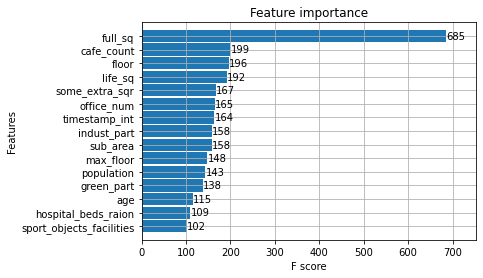

In [ ]:
plot_importance(model_2,max_num_features=15, height=0.9)

In [ ]:
scores = pd.DataFrame(val_y)

In [ ]:
scores['predicted'] = model.predict(xgb_test)

In [ ]:
scores['error'] = scores.price - scores.predicted

In [ ]:
scores

,price,predicted,error
2,5.826177e+06,8185364.50,-2.359188e+06
50,2.073190e+06,5457472.00,-3.384282e+06
107,4.656580e+06,4072528.00,5.840520e+05
144,8.098400e+05,4203023.00,-3.393183e+06
151,9.521222e+06,6285848.00,3.235374e+06
...,...,...,...
28897,5.506912e+06,3709084.25,1.797828e+06
28940,1.077087e+07,4950797.50,5.820074e+06
28948,6.990122e+06,7929919.50,-9.397977e+05
28970,7.936432e+06,7070230.00,8.662020e+05


In [ ]:
scores['error'].describe()

count    1.425000e+03
mean     5.817975e+05
std      5.661028e+06
min     -6.540370e+07
25%     -1.754145e+06
50%      4.843880e+05
75%      2.740956e+06
max      5.280897e+07
Name: error, dtype: float64

# ВТОРАЯ ЧАСТЬ


In [ ]:
df_train.sort_values(by = 'price',ascending = False).head(10).id.tolist()

[85073, 14154, 88100, 78059, 91175, 45584, 95572, 63901, 92747, 40136]

In [ ]:
df_train["year"] = df_train.timestamp.dt.year

In [ ]:
df_train["year_month"] = df_train.year.astype(str) + "_" + df_train.timestamp.dt.month.astype(str)

In [ ]:
df_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,year_month
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014,2014_12
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,2013,2013_6
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,2013,2013_9
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013,2013_12
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014,2014_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,101,4330300.0,2013,2013_5
28996,11345,2014-04-12,38,NaN,9.0,17.0,1.0,NaN,1.0,1.0,NaN,134,4779900.0,2014,2014_4
28997,55519,2013-09-23,55,30.0,9.0,16.0,1.0,2002.0,2.0,8.0,3.0,38,7260000.0,2013,2013_9
28998,17196,2013-11-19,37,19.0,3.0,16.0,5.0,1979.0,1.0,9.0,3.0,43,6018000.0,2013,2013_11


In [ ]:
ex_2 = df_train.groupby(by = ["year_month"]).agg(
    {"price":"mean"}
).reset_index()

In [ ]:
ex_2

,year_month,price
0,2011_10,5.942623e+06
1,2011_11,6.044407e+06
2,2011_12,6.459589e+06
3,2011_9,7.001000e+06
4,2012_1,6.396341e+06
5,2012_10,6.318532e+06
6,2012_11,6.109134e+06
7,2012_12,5.988347e+06
8,2012_2,7.216774e+06
9,2012_3,6.997146e+06


Text(0, 0.5, 'price')

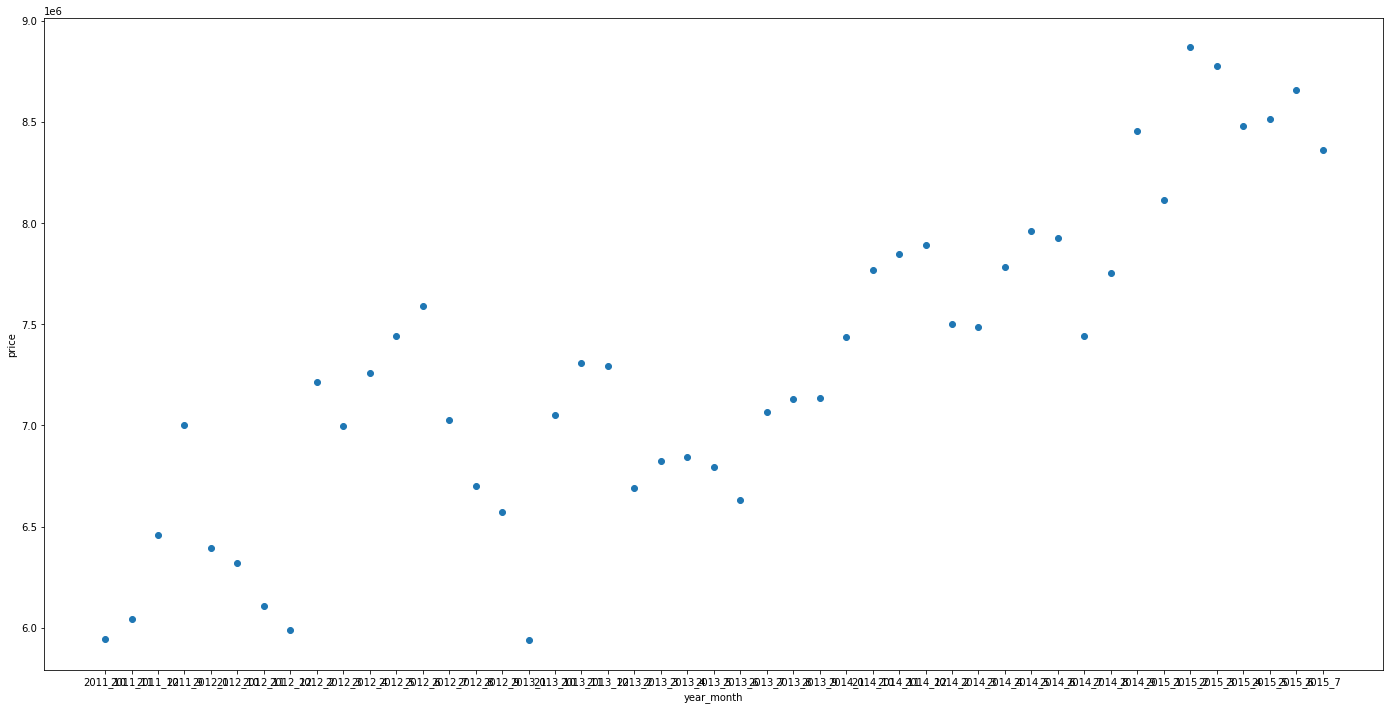

In [ ]:
plt.figure(figsize = (24,12))
plt.scatter(ex_2.year_month,ex_2.price)
plt.xlabel("year_month")
plt.ylabel("price")

In [ ]:
#Задание 3
a = df_train.groupby(by = ["year_month"]).agg(
    {"price":"max"}
).price.tolist()

In [ ]:
b = df_train[
    df_train.price.isin(a)
].index.tolist()


In [ ]:
b

[1740,
 2014,
 2526,
 3163,
 3767,
 5582,
 5829,
 5942,
 6705,
 6981,
 7055,
 7537,
 7755,
 8417,
 8788,
 9030,
 9340,
 10035,
 10213,
 12483,
 12729,
 13329,
 14321,
 14807,
 15217,
 15912,
 16898,
 18117,
 18599,
 20082,
 20316,
 20649,
 20799,
 22408,
 24097,
 24188,
 25278,
 26225,
 26274,
 26321,
 26644,
 27095,
 27279,
 27461,
 28566,
 28806,
 28868]

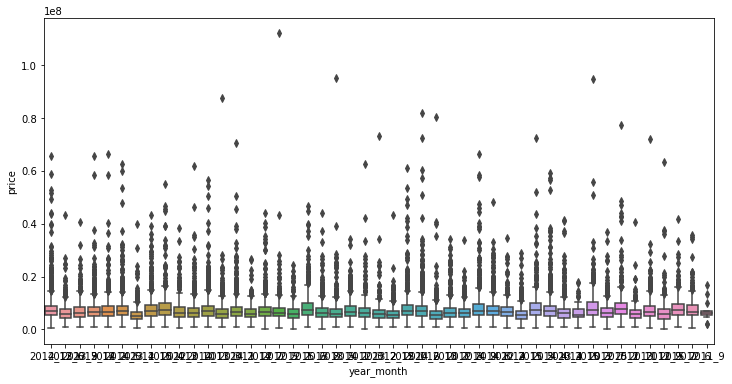

In [ ]:
#Задание 4
plt.figure(figsize = (12,6))
sns.boxplot(x = "year_month",y = "price", data = df_train)

In [ ]:
df_train.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'price', 'year', 'year_month'],
      dtype='object')

In [ ]:
df_train.sort_values(by = ["full_sq"],ascending= False).head(5).id.tolist()

[95156, 95936, 32115, 49518, 41202]

In [ ]:
df_train[df_train.life_sq.isna()].shape[0]

6065

In [ ]:
df_train.life_sq.isna().sum()

6065

In [ ]:
df_train.life_sq.fillna(df_train.life_sq.mean()).isna().sum()

0

In [ ]:
print(df_train.corr()["price"]["full_sq"])
print(df_train.corr()["price"]["life_sq"])

0.3371130874205802
0.4152906993761476


In [ ]:
df_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,year_month
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014,2014_12
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,2013,2013_6
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,2013,2013_9
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013,2013_12
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014,2014_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,101,4330300.0,2013,2013_5
28996,11345,2014-04-12,38,NaN,9.0,17.0,1.0,NaN,1.0,1.0,NaN,134,4779900.0,2014,2014_4
28997,55519,2013-09-23,55,30.0,9.0,16.0,1.0,2002.0,2.0,8.0,3.0,38,7260000.0,2013,2013_9
28998,17196,2013-11-19,37,19.0,3.0,16.0,5.0,1979.0,1.0,9.0,3.0,43,6018000.0,2013,2013_11


In [ ]:
df_train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year
count,29000.000000,29000.000000,22935.000000,28843.000000,19887.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,16088.000000,29000.000000,2.900000e+04,29000.000000
mean,54932.809724,55.235345,34.103248,7.665326,12.560567,1.821491,3.126422e+03,1.908282,6.424297,2.108031,76.503931,7.472051e+06,2013.510414
std,25981.968682,38.781299,20.911329,5.319891,6.775449,1.475440,1.582194e+05,0.853043,28.960510,0.882274,39.308253,5.056736e+06,0.971664
min,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05,2011.000000
25%,32382.500000,40.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,44.000000,4.957875e+06,2013.000000
50%,54984.500000,50.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,78.000000,6.553400e+06,2014.000000
75%,77417.500000,64.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,8.674925e+06,2014.000000
max,99999.000000,5329.000000,802.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,1.124444e+08,2015.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


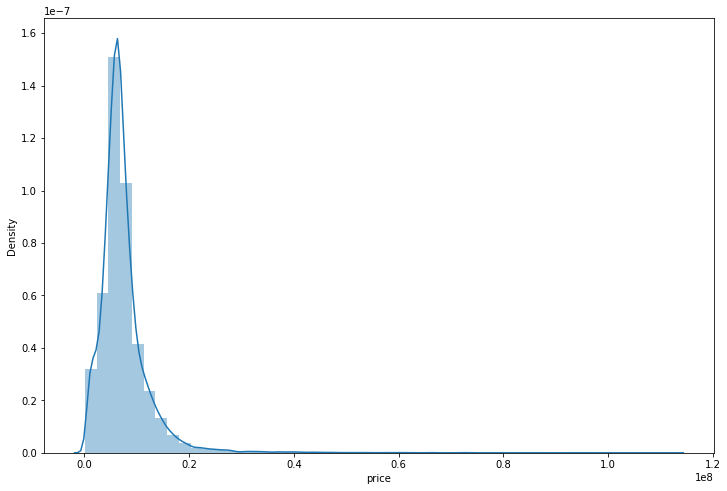

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(df_train.price.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

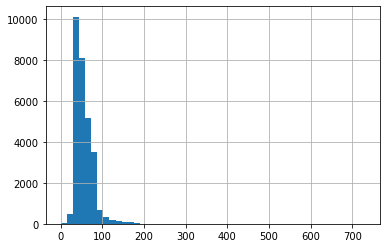

In [ ]:
df_train[df_train.full_sq < 1000].full_sq.hist(bins = 50)

In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100,120,140,160,180,200, 5330]
df_train['full_sq_bins'] = np.searchsorted(bins, df_train.full_sq.values)

In [ ]:
df_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,year_month,full_sq_bins
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014,2014_12,4
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,2013,2013_6,3
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,2013,2013_9,5
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013,2013_12,2
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014,2014_2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,101,4330300.0,2013,2013_5,4
28996,11345,2014-04-12,38,NaN,9.0,17.0,1.0,NaN,1.0,1.0,NaN,134,4779900.0,2014,2014_4,2
28997,55519,2013-09-23,55,30.0,9.0,16.0,1.0,2002.0,2.0,8.0,3.0,38,7260000.0,2013,2013_9,4
28998,17196,2013-11-19,37,19.0,3.0,16.0,5.0,1979.0,1.0,9.0,3.0,43,6018000.0,2013,2013_11,2


In [ ]:
for col in df_train.columns:
  s = df_train[col].isna().sum()
  p = df_train[col].isna().mean()
  print(f"{col} - {s} - {p}%")


id - 0 - 0.0%
timestamp - 0 - 0.0%
full_sq - 0 - 0.0%
life_sq - 6065 - 0.20913793103448275%
floor - 157 - 0.005413793103448276%
max_floor - 9113 - 0.31424137931034485%
material - 9113 - 0.31424137931034485%
build_year - 12941 - 0.44624137931034485%
num_room - 9113 - 0.31424137931034485%
kitch_sq - 9113 - 0.31424137931034485%
apartment condition - 12912 - 0.44524137931034485%
sub_area - 0 - 0.0%
price - 0 - 0.0%
year - 0 - 0.0%
year_month - 0 - 0.0%
full_sq_bins - 0 - 0.0%


In [ ]:
for col in df_train.columns:
  df_train[col] = df_train[col].fillna(df_train[col].median())

In [ ]:
drop_full_sq_index = df_train[
    df_train.full_sq < 10
].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_full_sq_index)

In [ ]:
drop_life_sq_index = df_train[
    df_train.full_sq <= df_train.life_sq
].index.tolist()

In [ ]:
drop_life_sq_index

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_life_sq_index)

In [ ]:
drop_kitchen_index = df_train[
    df_train.full_sq <= df_train.kitch_sq
].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_kitchen_index)

In [ ]:
drop_l_k = df_train[
    df_train.full_sq < (df_train.life_sq + df_train.kitch_sq)
].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_l_k)

In [ ]:
df_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,year_month,full_sq_bins
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014,2014_12,4
1,36540,2013-06-28,44,29.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,19,6643200.0,2013,2013_6,3
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013,2013_12,2
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014,2014_2,2
5,63050,2014-05-08,44,1.0,10.0,25.0,2.0,2014.0,1.0,1.0,1.0,134,5876100.0,2014,2014_5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58,30.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,101,4330300.0,2013,2013_5,4
28996,11345,2014-04-12,38,30.0,9.0,17.0,1.0,1979.0,1.0,1.0,2.0,134,4779900.0,2014,2014_4,2
28997,55519,2013-09-23,55,30.0,9.0,16.0,1.0,2002.0,2.0,8.0,3.0,38,7260000.0,2013,2013_9,4
28998,17196,2013-11-19,37,19.0,3.0,16.0,5.0,1979.0,1.0,9.0,3.0,43,6018000.0,2013,2013_11,2


In [ ]:
drop_f = df_train[
    df_train.floor > df_train.max_floor].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_f)

In [ ]:
df_train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,full_sq_bins
count,23467.000000,23467.000000,23467.000000,23467.000000,23467.000000,23467.000000,2.346700e+04,23467.000000,23467.000000,23467.000000,23467.000000,2.346700e+04,23467.000000,23467.00000
mean,54748.636639,54.166617,30.919802,6.934973,12.980398,1.608088,2.797410e+03,1.943921,6.153322,2.124260,74.585801,7.500357e+06,2013.565049,3.82469
std,25971.267469,22.491026,14.078316,4.764427,5.170992,1.307502,1.308844e+05,0.733121,3.340849,0.673608,40.466533,4.949359e+06,0.963173,1.90088
min,10001.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05,2011.000000,1.00000
25%,32105.500000,39.000000,20.000000,3.000000,9.000000,1.000000,1.973000e+03,1.000000,5.000000,2.000000,40.000000,5.105800e+06,2013.000000,2.00000
50%,54768.000000,49.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,72.000000,6.654300e+06,2014.000000,3.00000
75%,77195.000000,63.000000,34.000000,10.000000,17.000000,1.000000,1.985000e+03,2.000000,8.000000,2.000000,105.000000,8.753500e+06,2014.000000,5.00000
max,99999.000000,731.000000,232.000000,44.000000,99.000000,6.000000,2.005201e+07,19.000000,58.000000,33.000000,145.000000,1.124444e+08,2015.000000,14.00000


In [ ]:
drop_l = df_train[
    df_train.life_sq < 5
].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_l)

In [ ]:
drop_k = df_train[
    df_train.kitch_sq < 5
].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_k)

In [ ]:
drop_f_l = df_train[
    df_train.floor == 0
].index.tolist()

In [ ]:
drop_f_m = df_train[
    df_train.max_floor == 0
].index.tolist()

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_f_l)

In [ ]:
df_train = df_train.drop(axis = 0,index = drop_f_m)

# Моделирование


In [ ]:
import xgboost as xgb

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [ ]:
df_train.timestamp.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   19173
unique                   1403
top       2014-12-21 00:00:00
freq                       48
first     2011-09-06 00:00:00
last      2015-07-30 00:00:00
Name: timestamp, dtype: object

In [ ]:
df_train= df_train.merge(df_train_ad,how = "left",on = "id")

In [ ]:
train_X = df_train[df_train.timestamp < pd.to_datetime('2015-05-01')]
train_y = df_train[df_train.timestamp < pd.to_datetime('2015-05-01')].price
val_X = df_train.drop(['price','timestamp'], axis=1)[df_train.timestamp >= pd.to_datetime('2015-05-01')]
val_y =df_train[df_train.timestamp >= pd.to_datetime('2015-05-01')].price

In [ ]:
col_list = df_train.drop(axis = 1,columns = ["id","timestamp","year_month","price"]).columns 

In [ ]:
xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list)
xgb_test = xgb.DMatrix(val_X[col_list], val_y, feature_names = col_list)

In [ ]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [ ]:
model = xgb.train(params = xgb_params,
                  dtrain = xgb_train, 
                  num_boost_round = 600, 
                  evals = evallist, 
                  early_stopping_rounds = 10, 
                  verbose_eval = 10)

[0]	eval-rmse:1.0718e+07	train-rmse:8.78043e+06
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[10]	eval-rmse:7.44472e+06	train-rmse:5.95710e+06
[20]	eval-rmse:5.60621e+06	train-rmse:4.45198e+06
[30]	eval-rmse:4.63864e+06	train-rmse:3.6977e+06
[40]	eval-rmse:4.18896e+06	train-rmse:3.33179e+06
[50]	eval-rmse:3.9056e+06	train-rmse:3.14621e+06
[60]	eval-rmse:3.76949e+06	train-rmse:3.04463e+06
[70]	eval-rmse:3.69761e+06	train-rmse:2.9839e+06
[80]	eval-rmse:3.63549e+06	train-rmse:2.94116e+06
[90]	eval-rmse:3.58289e+06	train-rmse:2.89944e+06
[100]	eval-rmse:3.54792e+06	train-rmse:2.86936e+06
[110]	eval-rmse:3.49429e+06	train-rmse:2.84098e+06
[120]	eval-rmse:3.49307e+06	train-rmse:2.81976e+06
[130]	eval-rmse:3.46878e+06	train-rmse:2.79906e+06
[140]	eval-rmse:3.45515e+06	train-rmse:2.78097e+06
[150]	eval-rmse:3.44846e+06	train-rmse:2.76513e+06
[160]	eval-rmse:3.4387e+06	train-rmse:2.75236e+06
[170

In [ ]:
from xgboost import plot_importance 

TypeError: ignored

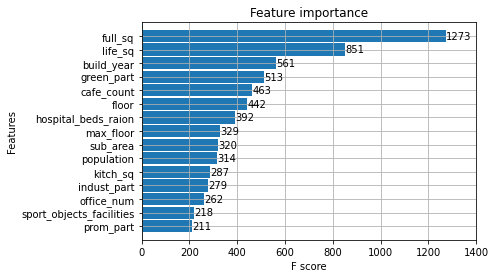

In [ ]:
plot_importance(model,max_num_features=15, height=0.9)